In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader  
from skimage import io

In [3]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms

# Experiment 3

In [4]:
!unzip "/content/drive/MyDrive/dataset/Dataset_2.zip"

Archive:  /content/drive/MyDrive/dataset/Dataset_2.zip
   creating: Dataset_2/
  inflating: Dataset_2/t10k-images-idx3-ubyte  
  inflating: Dataset_2/t10k-labels-idx1-ubyte  
  inflating: Dataset_2/train-images-idx3-ubyte  
  inflating: Dataset_2/train-labels-idx1-ubyte  
  inflating: Dataset_2/verification_test.csv  
  inflating: Dataset_2/verification_train.csv  


In [5]:
train_csv2  = pd.read_csv('/content/Dataset_2/verification_train.csv')
test_csv2 = pd.read_csv('/content/Dataset_2/verification_test.csv')

In [6]:
import numpy as np
class second_Dataset(Dataset):
    """User defined class to build a datset using Pytorch class Dataset."""
    
    def __init__(self, data, transform = None):
        """Method to initilaize variables.""" 
        self.data_MNIST = list(data.values)
        self.transform = transform
        
        label = []
        image = []
        
        for i in self.data_MNIST:
             # first column is of labels.
            label.append(i[0])
            image.append(i[1:])
        self.labels = np.asarray(label)
        self.images = np.asarray(image).reshape(-1, 28, 28, 1).astype('float32')

    def __getitem__(self, index):
        label = self.labels[index]
        image = self.images[index]
        
        if self.transform is not None:
            image = self.transform(image)

        return image, label

    def __len__(self):
        return len(self.images)

In [7]:
train_set = second_Dataset(train_csv2, transform=transforms.Compose([transforms.ToTensor()]))
test_set = second_Dataset(test_csv2, transform=transforms.Compose([transforms.ToTensor()]))

train_loader = DataLoader(train_set, batch_size=100)
test_loader = DataLoader(train_set, batch_size=100)

For experiment 1

In [8]:
print(len(train_set))
print(len(test_set))

60000
10000


In [10]:
# Hyperparameters

batch_size = 20
num_iters = 20000
input_dim = 28*28 # num_features = 784
num_hidden = 200 # num of hidden nodes
output_dim = 10

learning_rate = 1e-4  # More power so we can learn faster! previously it was 0.001

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")




'''
MAKING DATASET ITERABLE
'''
num_epochs = num_iters / (len(train_set) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_set, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test_set, 
                                          batch_size=batch_size, 
                                          shuffle=False)





class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()
        ### 1st hidden layer: 784 --> 100
        self.linear_1 = nn.Linear(input_size, num_hidden)
        ### Non-linearity in 1st hidden layer
        self.relu_1 = nn.ReLU()

        ### 2nd hidden layer: 100 --> 100
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_2 = nn.ReLU()

        ### 3rd hidden layer: 100 --> 100
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_3 = nn.ReLU()

        ### 4th hidden layer: 100 --> 100
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_4 = nn.ReLU()

        ### 5th hidden layer: 100 --> 100
        self.linear_5 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_5 = nn.ReLU()

        ### 6th hidden layer: 100 --> 100
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        ### Non-linearity in 2nd hidden layer
        self.relu_6 = nn.ReLU()

        ### Output layer: 100 --> 10
        self.linear_out = nn.Linear(num_hidden, num_classes)

    def forward(self, x):
        ### 1st hidden layer
        out  = self.linear_1(x)
        ### Non-linearity in 1st hidden layer
        out = self.relu_1(out)
        
        ### 2nd hidden layer
        out  = self.linear_2(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_2(out)
        
        ### 3rd hidden layer
        out  = self.linear_3(out)
        ### Non-linearity in 1st hidden layer
        out = self.relu_3(out)
        
        ### 4th hidden layer
        out  = self.linear_4(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_4(out)

        ### 5th hidden layer
        out  = self.linear_5(out)
        ### Non-linearity in 1st hidden layer
        out = self.relu_5(out)
        
        ### 6th hidden layer
        out  = self.linear_6(out)
        ### Non-linearity in 2nd hidden layer
        out = self.relu_6(out)
     
        # Linear layer (output)
        probas  = self.linear_out(out)
        return probas


# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)
# To enable GPU
model.to(device)

# INSTANTIATE LOSS & OPTIMIZER CLASS

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
iteration_loss= []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 1.9339832067489624. Accuracy: 52.04
Iteration: 1000. Loss: 1.7489538192749023. Accuracy: 61.98
Iteration: 1500. Loss: 1.2468540668487549. Accuracy: 63.81
Iteration: 2000. Loss: 0.9672842025756836. Accuracy: 66.45
Iteration: 2500. Loss: 0.9880426526069641. Accuracy: 68.0
Iteration: 3000. Loss: 0.7906092405319214. Accuracy: 71.12
Iteration: 3500. Loss: 0.7596513628959656. Accuracy: 72.73
Iteration: 4000. Loss: 0.5931726098060608. Accuracy: 74.11
Iteration: 4500. Loss: 0.7387098073959351. Accuracy: 75.73
Iteration: 5000. Loss: 0.4783708155155182. Accuracy: 76.66
Iteration: 5500. Loss: 0.5172479748725891. Accuracy: 77.24
Iteration: 6000. Loss: 0.519318699836731. Accuracy: 78.11
Iteration: 6500. Loss: 0.4010235369205475. Accuracy: 78.67
Iteration: 7000. Loss: 0.4596472382545471. Accuracy: 78.95
Iteration: 7500. Loss: 0.7017530202865601. Accuracy: 79.13
Iteration: 8000. Loss: 0.3737754821777344. Accuracy: 80.06
Iteration: 8500. Loss: 0.6467982530593872. Accuracy: 80.75


[1.9339832067489624, 1.7489538192749023, 1.2468540668487549, 0.9672842025756836, 0.9880426526069641, 0.7906092405319214, 0.7596513628959656, 0.5931726098060608, 0.7387098073959351, 0.4783708155155182, 0.5172479748725891, 0.519318699836731, 0.4010235369205475, 0.4596472382545471, 0.7017530202865601, 0.3737754821777344, 0.6467982530593872, 0.7300059795379639, 0.24048280715942383, 0.7616409659385681, 0.4813566207885742, 0.3465925455093384, 0.5817760825157166, 0.23473882675170898, 0.3263052701950073, 0.6548877358436584, 0.3617123067378998, 0.5806191563606262, 0.4600546956062317, 0.5296441912651062, 0.6402001976966858, 0.5795303583145142, 0.7650244832038879, 0.4020453989505768, 0.6105581521987915, 0.7028201818466187]


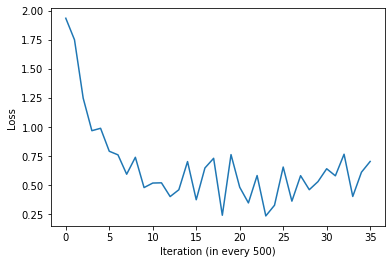

In [11]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()

For experiment 2

In [13]:
# Hyperparameters

#Batch Parameters
batch_size = 250
num_iters = 20000
input_dim = 28*28
num_hidden = 400
output_dim = 10

learning_rate = 1e-4

num_epochs = num_iters / (len(train_set) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")



'''
MAKING DATASET ITERABLE
'''

train_loader = torch.utils.data.DataLoader(dataset=train_set, 
                                           batch_size=batch_size, 
                                           shuffle=True)   # It's better to shuffle the whole training dataset! 

test_loader = torch.utils.data.DataLoader(dataset=test_set, 
                                          batch_size=batch_size, 
                                          shuffle=False)  

class DeepNeuralNetworkModel(nn.Module):
    def __init__(self, input_size, num_classes, num_hidden):
        super().__init__()

       #First Hidden Layer
        self.linear_1 = nn.Linear(input_size, num_hidden)
        self.relu_1 = nn.Tanh()

        #2nd Hidden Layer
        self.linear_2 = nn.Linear(num_hidden, num_hidden)
        self.relu_2 = nn.Tanh()

         #3rd Hidden Layer
        self.linear_3 = nn.Linear(num_hidden, num_hidden)
        self.relu_3 = nn.Softmax(dim=0)

         #4th Hidden Layer
        self.linear_4 = nn.Linear(num_hidden, num_hidden)
        self.relu_4 = nn.Softmax(dim=0)

         #5th Hidden Layer
        self.linear_5= nn.Linear(num_hidden, num_hidden)
        self.relu_5= nn.Tanh()
        
        #6th Hidden Layer
        self.linear_6 = nn.Linear(num_hidden, num_hidden)
        self.relu_6 = nn.Tanh()

        #7th Hidden Layer
        self.linear_7 = nn.Linear(num_hidden, num_hidden)
        self.relu_7 = nn.Tanh()

 
        self.linear_out = nn.Linear(num_hidden, num_classes)
 
    def forward(self, x):
        out  = self.linear_1(x)
        out = self.relu_1(out)
        
        out  = self.linear_2(out)
        out = self.relu_2(out)
 
        out  = self.linear_3(out)
        out = self.relu_3(out)
 
        out  = self.linear_4(out)
        out = self.relu_4(out)
 
        out  = self.linear_5(out)
        out = self.relu_5(out)
 
        out  = self.linear_6(out)
        out = self.relu_6(out)

        out  = self.linear_7(out)
        out = self.relu_7(out)

        
        
        probas  = self.linear_out(out)
        return probas


# INSTANTIATE MODEL CLASS

model = DeepNeuralNetworkModel(input_size = input_dim,
                               num_classes = output_dim,
                               num_hidden = num_hidden)
# To enable GPU
model.to(device)

# INSTANTIATE LOSS & OPTIMIZER CLASS

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

iteration_loss = []
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.view(-1, 28*28).to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images) 

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
               
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs, 1)

                # Total number of labels
                total += labels.size(0)


                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum() 
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            iteration_loss.append(loss.item())
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

83
Iteration: 500. Loss: 2.300344228744507. Accuracy: 10.0
Iteration: 1000. Loss: 2.3038783073425293. Accuracy: 10.0
Iteration: 1500. Loss: 2.302445650100708. Accuracy: 10.0
Iteration: 2000. Loss: 2.2996532917022705. Accuracy: 10.0
Iteration: 2500. Loss: 2.3011879920959473. Accuracy: 10.0
Iteration: 3000. Loss: 2.3032448291778564. Accuracy: 10.0
Iteration: 3500. Loss: 2.3011960983276367. Accuracy: 10.0
Iteration: 4000. Loss: 2.3012115955352783. Accuracy: 10.0
Iteration: 4500. Loss: 2.303861379623413. Accuracy: 10.0
Iteration: 5000. Loss: 2.300896644592285. Accuracy: 10.0
Iteration: 5500. Loss: 2.3021233081817627. Accuracy: 10.0
Iteration: 6000. Loss: 2.3034751415252686. Accuracy: 10.0
Iteration: 6500. Loss: 2.3033652305603027. Accuracy: 10.0
Iteration: 7000. Loss: 2.305067777633667. Accuracy: 10.0
Iteration: 7500. Loss: 2.3014633655548096. Accuracy: 10.0
Iteration: 8000. Loss: 2.302367687225342. Accuracy: 10.0
Iteration: 8500. Loss: 2.3033783435821533. Accuracy: 10.0
Iteration: 9000. L

[2.300344228744507, 2.3038783073425293, 2.302445650100708, 2.2996532917022705, 2.3011879920959473, 2.3032448291778564, 2.3011960983276367, 2.3012115955352783, 2.303861379623413, 2.300896644592285, 2.3021233081817627, 2.3034751415252686, 2.3033652305603027, 2.305067777633667, 2.3014633655548096, 2.302367687225342, 2.3033783435821533, 2.30427885055542, 2.3015599250793457, 2.303417444229126, 2.302125930786133, 2.30362868309021, 2.3022890090942383, 2.302760362625122, 2.3013246059417725, 2.302885055541992, 2.305804491043091, 2.3035435676574707, 2.3029375076293945, 2.3035807609558105, 2.3005146980285645, 2.3042712211608887, 2.3044486045837402, 2.3029916286468506, 2.301068067550659, 2.30269193649292, 2.300403594970703, 2.302835702896118, 2.3020684719085693]


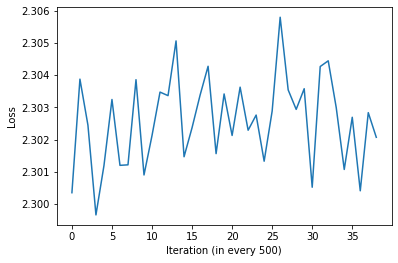

In [14]:
import matplotlib
import matplotlib.pyplot as plt

print (iteration_loss)
plt.plot(iteration_loss)
plt.ylabel('Loss')
plt.xlabel('Iteration (in every 500)')
plt.show()